In [3]:
c_genes = ['p53', 'akt1', 'bcl2', 'cd274', 'ctnnb1', 'egfr', 'erbb2', 'esr1', 'ewsr1', 'fgfr3', 'mdm2', 'myc', 'mycn', 'numa1',
          'runx2', 'usp7']
nc_genes = ['atad2', 'bnip1', 'cpne3', 'epb41', 'gapdh', 'gprc5a', 'hrk', 'sema4c', 'znf653', 'zyve28']

In [118]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import numpy as np

In [5]:
sample_network = pd.read_csv("p53_1.csv")

In [6]:
sample_network.head(10)

,#node1,node2,node1_string_id,node2_string_id,neighborhood_on_chromosome,gene_fusion,phylogenetic_cooccurrence,homology,coexpression,experimentally_determined_interaction,database_annotated,automated_textmining,combined_score
0,AURKA,RPA1,9606.ENSP00000216911,9606.ENSP00000254719,0,0,0.000,0.00,0.456,0.000,0.00,0.074,0.475
1,AURKA,CDK2,9606.ENSP00000216911,9606.ENSP00000266970,0,0,0.431,0.76,0.298,0.326,0.00,0.592,0.616
2,AURKA,MDM2,9606.ENSP00000216911,9606.ENSP00000258149,0,0,0.000,0.00,0.000,0.270,0.00,0.515,0.631
3,AURKA,EP300,9606.ENSP00000216911,9606.ENSP00000263253,0,0,0.000,0.00,0.000,0.000,0.65,0.217,0.714
4,AURKA,BARD1,9606.ENSP00000216911,9606.ENSP00000260947,0,0,0.000,0.00,0.250,0.282,0.00,0.539,0.730
5,AURKA,TP53,9606.ENSP00000216911,9606.ENSP00000269305,0,0,0.000,0.00,0.096,0.875,0.90,0.935,0.999
6,BARD1,AURKA,9606.ENSP00000260947,9606.ENSP00000216911,0,0,0.000,0.00,0.250,0.282,0.00,0.539,0.730
7,BARD1,UBE3A,9606.ENSP00000260947,9606.ENSP00000232165,0,0,0.000,0.00,0.065,0.296,0.00,0.306,0.503
8,BARD1,RPA1,9606.ENSP00000260947,9606.ENSP00000254719,0,0,0.000,0.00,0.171,0.000,0.60,0.398,0.783
9,BARD1,MDM2,9606.ENSP00000260947,9606.ENSP00000258149,0,0,0.000,0.00,0.000,0.000,0.00,0.512,0.512


In [8]:
G = nx.from_pandas_edgelist(sample_network, source='#node1', target='node2', edge_attr='combined_score')

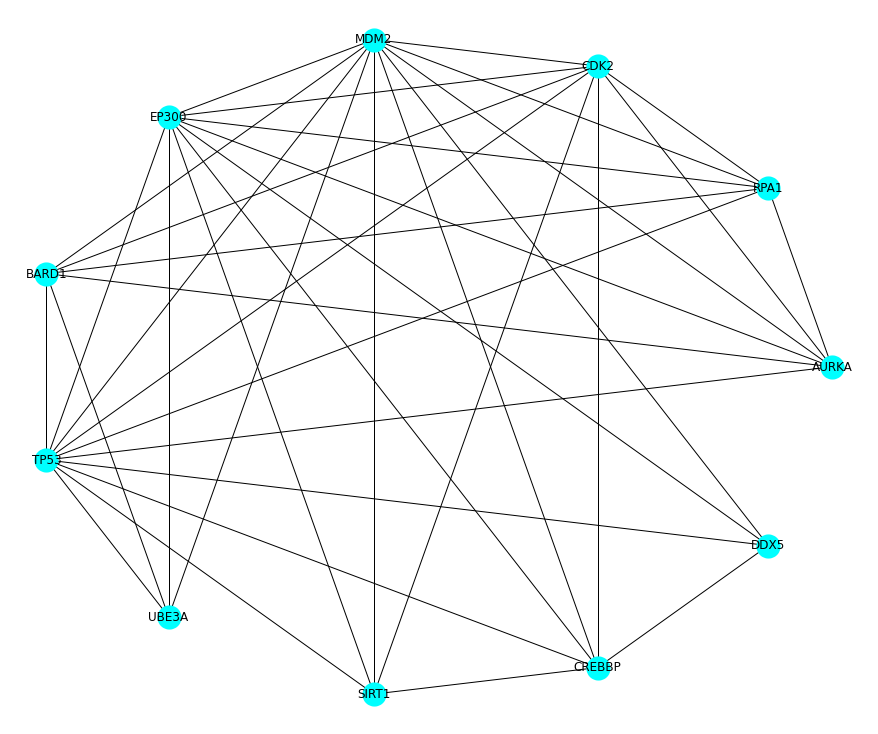

In [9]:
plt.figure(figsize=(12,10))
nx.draw_circular(G, with_labels=True, node_size=200, alpha=1, linewidths=10, node_color='cyan')
plt.show()

In [10]:
genes = {}

for file_name in c_genes:
    df = pd.read_csv(file_name+'_1.csv')
    genes[file_name] = [df, 1]
    
for file_name in nc_genes:
    df = pd.read_csv(file_name+'_1.csv')
    genes[file_name] = [df, 0]

In [11]:
names = set()

for y in genes.values():
    for i,j in y[0].iterrows():
        names.add(j[0])

In [12]:
len(names)

240

In [43]:
data=pd.DataFrame(columns=sample_network.columns)

In [44]:
for i,x in genes.items():
    y=[]
    v=x[1]
    x=x[0]
    #data.append([node2vec(x), y])
    for row in x.iterrows():
        y.append(v)
    x['class']=v
    data = data.append(x, ignore_index=True)

In [45]:
data

,#node1,node2,node1_string_id,node2_string_id,neighborhood_on_chromosome,gene_fusion,phylogenetic_cooccurrence,homology,coexpression,experimentally_determined_interaction,database_annotated,automated_textmining,combined_score,class
0,AURKA,RPA1,9606.ENSP00000216911,9606.ENSP00000254719,0,0,0.000,0.00,0.456,0.000,0.00,0.074,0.475,1.0
1,AURKA,CDK2,9606.ENSP00000216911,9606.ENSP00000266970,0,0,0.431,0.76,0.298,0.326,0.00,0.592,0.616,1.0
2,AURKA,MDM2,9606.ENSP00000216911,9606.ENSP00000258149,0,0,0.000,0.00,0.000,0.270,0.00,0.515,0.631,1.0
3,AURKA,EP300,9606.ENSP00000216911,9606.ENSP00000263253,0,0,0.000,0.00,0.000,0.000,0.65,0.217,0.714,1.0
4,AURKA,BARD1,9606.ENSP00000216911,9606.ENSP00000260947,0,0,0.000,0.00,0.250,0.282,0.00,0.539,0.730,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1797,ZFYVE28,JPH1,9606.ENSP00000290974,9606.ENSP00000344488,0,0,0.000,0.00,0.062,0.000,0.00,0.689,0.696,0.0
1798,ZFYVE28,EXD2,9606.ENSP00000290974,9606.ENSP00000313140,0,0,0.000,0.00,0.062,0.000,0.00,0.697,0.704,0.0
1799,ZFYVE28,EPS8L3,9606.ENSP00000290974,9606.ENSP00000358820,0,0,0.000,0.00,0.000,0.000,0.00,0.709,0.709,0.0
1800,ZFYVE28,SOS1,9606.ENSP00000290974,9606.ENSP00000387784,0,0,0.000,0.00,0.049,0.000,0.90,0.101,0.907,0.0


In [46]:
data['class'].value_counts()

1.0    1200
0.0     602
Name: class, dtype: int64

In [47]:
col = data.columns
col = col[:-1]

In [48]:
data[data.duplicated(subset=data.columns)]

,#node1,node2,node1_string_id,node2_string_id,neighborhood_on_chromosome,gene_fusion,phylogenetic_cooccurrence,homology,coexpression,experimentally_determined_interaction,database_annotated,automated_textmining,combined_score,class
86,EP300,MDM2,9606.ENSP00000263253,9606.ENSP00000258149,0,0,0.0,0.000,0.000,0.874,0.9,0.989,0.999,1.0
117,MDM2,EP300,9606.ENSP00000258149,9606.ENSP00000263253,0,0,0.0,0.000,0.000,0.874,0.9,0.989,0.999,1.0
368,CREBBP,EP300,9606.ENSP00000262367,9606.ENSP00000263253,0,0,0.0,0.957,0.835,0.805,0.9,0.989,0.996,1.0
384,EP300,CREBBP,9606.ENSP00000263253,9606.ENSP00000262367,0,0,0.0,0.957,0.835,0.805,0.9,0.989,0.996,1.0
500,EGF,HSP90AA1,9606.ENSP00000265171,9606.ENSP00000335153,0,0,0.0,0.000,0.000,0.057,0.9,0.523,0.951,1.0
506,EGF,EGFR,9606.ENSP00000265171,9606.ENSP00000275493,0,0,0.0,0.000,0.160,0.982,0.9,0.991,0.999,1.0
507,EGFR,EGF,9606.ENSP00000275493,9606.ENSP00000265171,0,0,0.0,0.000,0.160,0.982,0.9,0.991,0.999,1.0
515,EGFR,HSP90AA1,9606.ENSP00000275493,9606.ENSP00000335153,0,0,0.0,0.000,0.000,0.884,0.9,0.989,0.999,1.0
550,HSP90AA1,EGF,9606.ENSP00000335153,9606.ENSP00000265171,0,0,0.0,0.000,0.000,0.057,0.9,0.523,0.951,1.0
552,HSP90AA1,EGFR,9606.ENSP00000335153,9606.ENSP00000275493,0,0,0.0,0.000,0.000,0.884,0.9,0.989,0.999,1.0


In [49]:
data = data.drop_duplicates()

In [50]:
data.shape

(1754, 14)

In [32]:
data['#node1'].nunique()

240

In [88]:
X = data.copy()

In [89]:
unique_values = pd.unique(data[['#node1', 'node2']].values.ravel())
ohe = OneHotEncoder(categories = [unique_values]*2, sparse = False)
encoded = pd.DataFrame(ohe.fit_transform(data[['#node1', 'node2']]), columns=ohe.get_feature_names(['#node1', 'node2']))

In [90]:
encoded

,#node1_AURKA,#node1_RPA1,#node1_CDK2,#node1_MDM2,#node1_EP300,#node1_BARD1,#node1_TP53,#node1_UBE3A,#node1_SIRT1,#node1_CREBBP,...,node2_NR5A2,node2_NR5A1,node2_ZFYVE28,node2_SOS1,node2_EPS8L3,node2_JPH1,node2_EXD2,node2_MXD4,node2_PRELID1,node2_VPS37D
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1749,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1750,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1751,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1752,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [91]:
X = pd.concat([X, encoded], axis=1, join='inner')

In [92]:
X

,#node1,node2,node1_string_id,node2_string_id,neighborhood_on_chromosome,gene_fusion,phylogenetic_cooccurrence,homology,coexpression,experimentally_determined_interaction,...,node2_NR5A2,node2_NR5A1,node2_ZFYVE28,node2_SOS1,node2_EPS8L3,node2_JPH1,node2_EXD2,node2_MXD4,node2_PRELID1,node2_VPS37D
0,AURKA,RPA1,9606.ENSP00000216911,9606.ENSP00000254719,0,0,0.000,0.00,0.456,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,AURKA,CDK2,9606.ENSP00000216911,9606.ENSP00000266970,0,0,0.431,0.76,0.298,0.326,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,AURKA,MDM2,9606.ENSP00000216911,9606.ENSP00000258149,0,0,0.000,0.00,0.000,0.270,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,AURKA,EP300,9606.ENSP00000216911,9606.ENSP00000263253,0,0,0.000,0.00,0.000,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,AURKA,BARD1,9606.ENSP00000216911,9606.ENSP00000260947,0,0,0.000,0.00,0.250,0.282,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1749,UBA3,FAM83F,9606.ENSP00000354340,9606.ENSP00000330432,0,0,0.000,0.00,0.000,0.000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1750,ZNF653,DTWD1,9606.ENSP00000293771,9606.ENSP00000251250,0,0,0.000,0.00,0.000,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1751,ZNF653,NCOA2,9606.ENSP00000293771,9606.ENSP00000399968,0,0,0.000,0.00,0.000,0.060,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1752,ZNF653,TTLL10,9606.ENSP00000293771,9606.ENSP00000368592,0,0,0.000,0.00,0.000,0.000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [93]:
cat_cols = [col for col in X.columns if type(X[col].all())==str]
X = X.drop(cat_cols, axis=1)

In [94]:
X.shape

(1706, 490)

In [95]:
y = X.pop('class')

In [113]:
X.gene_fusion = X.gene_fusion.astype(str).astype(float)
X.neighborhood_on_chromosome = X.neighborhood_on_chromosome.astype(str).astype(float)

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [115]:
model_1 = keras.Sequential([
    keras.layers.Dense(493, activation=tf.nn.relu),
    keras.layers.Dense(256, activation=tf.nn.relu),
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

In [116]:
model_1.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model_1.fit(X_train.values, y_train.values, epochs=50, batch_size=1)

Epoch 1/50
1364/1364 [==============================] - 2s 2ms/step - loss: 0.2310 - accuracy: 0.9003
Epoch 2/50
1364/1364 [==============================] - 2s 1ms/step - loss: 0.0477 - accuracy: 0.9853
Epoch 3/50
1364/1364 [==============================] - 2s 1ms/step - loss: 0.0351 - accuracy: 0.9912
Epoch 4/50
1364/1364 [==============================] - 2s 1ms/step - loss: 0.0368 - accuracy: 0.9875
Epoch 5/50
1364/1364 [==============================] - 2s 1ms/step - loss: 0.0234 - accuracy: 0.9905
Epoch 6/50
1364/1364 [==============================] - 2s 1ms/step - loss: 0.0086 - accuracy: 0.9956
Epoch 7/50
1364/1364 [==============================] - 2s 2ms/step - loss: 0.0115 - accuracy: 0.9963
Epoch 8/50
1364/1364 [==============================] - 2s 2ms/step - loss: 0.0141 - accuracy: 0.9934
Epoch 9/50
1364/1364 [==============================] - 2s 1ms/step - loss: 0.0253 - accuracy: 0.9927
Epoch 10/50
1364/1364 [==============================] - 2s 2ms/step - loss: 0.017

In [117]:
test_loss, test_acc = model_1.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

11/11 [==============================] - 0s 2ms/step - loss: 0.4597 - accuracy: 0.9825
Test accuracy: 0.9824561476707458
